# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.


### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

C:\Users\pyarlagadda01\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations with missing data in atleast couple rows

#### Question 2. Create a summary table

In [ ]:
#function

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE and GPA are on different scales. 200 <= GRE <= 800, 0 <= GPA <= 4

#### Question 4. Drop data points with missing data


In [5]:
df_clean = df_raw.dropna()

In [7]:
df_clean.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [8]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [9]:
df_clean.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Check using count() and isnull() functions

In [10]:
df_clean[df_clean['admit'].isnull()]

,admit,gre,gpa,prestige


In [11]:
df_clean[df_clean['gre'].isnull()]

,admit,gre,gpa,prestige


In [12]:
df_clean[df_clean['gpa'].isnull()]

,admit,gre,gpa,prestige


In [13]:
df_clean[df_clean['prestige'].isnull()]

,admit,gre,gpa,prestige


#### Question 6. Create box plots for GRE and GPA

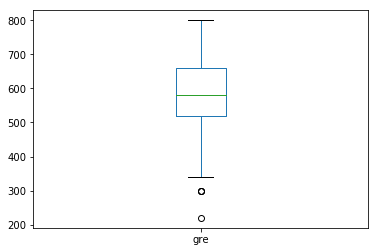

In [15]:
#boxplot 1
df_clean.plot('admit','gre', kind='box')

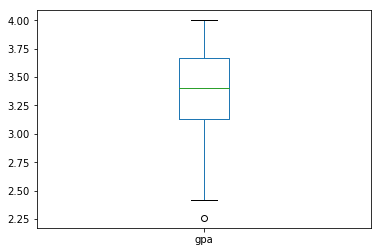

In [16]:
#boxplot 2 
df_clean.plot('admit','gpa', kind='box')

#### Question 7. What do this plots show?

Answer: Outliers, min, max, median, and distribution of data

#### Question 8. Describe each distribution 

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E367F60>]], dtype=object)

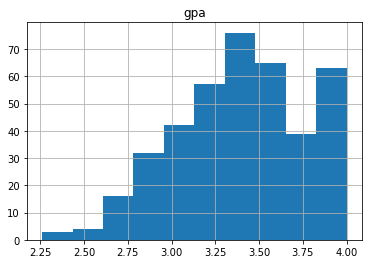

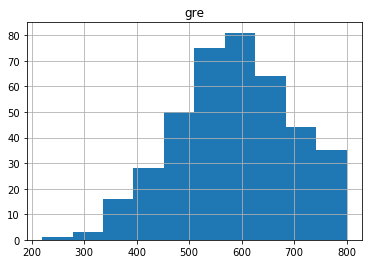

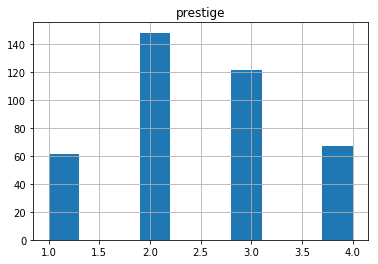

In [17]:
# plot the distribution of each variable 
%matplotlib inline
%pylab inline

df_clean.hist('gpa')
df_clean.hist('gre')
df_clean.hist('prestige')

In [23]:
df_clean.kurtosis()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

Distribution indicates that data is negatively skewed

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, Kurtosis indicates there is skewness in our data

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, because the variables are skewed and are on different scale. Normalize the variables (z-score) to bring them on the same scale centered at zero.

#### Question 11. Which of our variables are potentially colinear? 

In [46]:
# create a correlation matrix for the data
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.755)


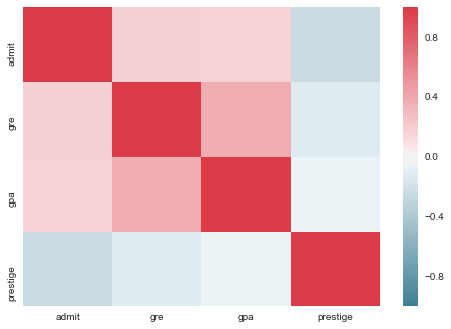

In [48]:
import seaborn as sns
sns.set_style("darkgrid")

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = df_clean.corr()# what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

#### Question 12. What did you find?

Answer: GRE and GPA are potentially colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Use scatter plot to explore association

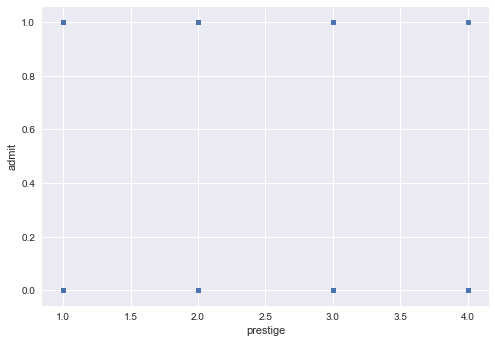

In [56]:
df_clean.plot(x='prestige',y='admit',kind='scatter')

#### Question 14. What is your hypothesis? 

Answer: R-squared is very low which indicates admit (outcome) cannot be easily predicted by prestige (variable)

In [58]:
import statsmodels.formula.api as smf

X = df_clean['prestige']
y = df_clean['admit']

lm = smf.ols(formula='admit ~ prestige', data=df_clean).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     24.91
Date:                Sun, 22 Oct 2017   Prob (F-statistic):           9.02e-07
Time:                        21:56:38   Log-Likelihood:                -247.58
No. Observations:                 397   AIC:                             499.2
Df Residuals:                     395   BIC:                             507.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6157      0.064      9.630      0.000       0.490       0.741
prestige      -0.1199      0.024     -4.991      0.000      -0.167      -0.073
==============================================================================
Omnibus:                      289.617   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.484
Skew:                           0.718   Prob(JB):                     2.00e-13
Kurtosis:                       1.785   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    5a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

Test error is the error you get when you run the trained model on a set of data that it has previously never been exposed to. Train error is the variance between the actual and predicted values.

Use K-fold cross validation to pick the best model that's optimal for both train and test data.

MSE(mean squared error) and R-square

Grid Search CV package

Lasso and Ridge are two regularization methods that penalize overfitting. Lasso drops less significant features by minimizing coefficients' sum but Ridge pushes less significant features' coefficients close to 0 keeping R-square high. 

Lasso helps with variable selection but compromises on the accuracy
Ridge accounts for all variables but pushes the coefficients close to 0. Ridge typically has higher R2 than Lasso

Fill the missing data with mean values

Adding sum of coefficients to the residual error that needs to be minimized pushes insignificant coefficients to 0

Using Lasso regularization method helps drop variables that are multi-colinear

KNN uses distance from test point to identify K nearest neighbors and then classifies based on majority or weighted sum.